In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [304]:
df1 = pd.read_csv("2023data.csv")
df2 = pd.read_csv('2024data.csv')

df3=pd.read_csv('2025data.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,120090007,3,21,ug/m3 SC,19,Melbourne,1,100.0,...,PM10 Total 0-10um STP,239.0,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
1,01/02/2023,AQS,120090007,3,13,ug/m3 SC,12,Melbourne,1,100.0,...,PM10 Total 0-10um STP,239.0,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
2,01/03/2023,AQS,120090007,3,12,ug/m3 SC,11,Melbourne,1,100.0,...,PM10 Total 0-10um STP,239.0,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
3,01/04/2023,AQS,120090007,3,14,ug/m3 SC,13,Melbourne,1,100.0,...,PM10 Total 0-10um STP,239.0,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
4,01/05/2023,AQS,120090007,3,12,ug/m3 SC,11,Melbourne,1,100.0,...,PM10 Total 0-10um STP,239.0,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611


In [305]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           21325 non-null  object 
 1   Source                         21325 non-null  object 
 2   Site ID                        21325 non-null  int64  
 3   POC                            21325 non-null  int64  
 4   Daily Mean PM10 Concentration  21325 non-null  int64  
 5   Units                          21325 non-null  object 
 6   Daily AQI Value                21325 non-null  int64  
 7   Local Site Name                21325 non-null  object 
 8   Daily Obs Count                21325 non-null  int64  
 9   Percent Complete               21325 non-null  float64
 10  AQS Parameter Code             21325 non-null  int64  
 11  AQS Parameter Description      21325 non-null  object 
 12  Method Code                    19560 non-null 

In [306]:
df.describe()

,Site ID,POC,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
count,2.132500e+04,21325.000000,21325.000000,21325.000000,21325.0,21325.0,21325.0,19560.000000,21325.000000,21325.0,21325.000000,21325.000000,21325.000000
mean,1.207465e+08,2.333505,18.357421,16.958030,1.0,100.0,81102.0,371.357311,35104.458617,12.0,74.504244,28.065405,-81.894888
std,3.730145e+05,0.902229,9.031645,8.074845,0.0,0.0,0.0,249.747890,8082.994007,0.0,37.254891,1.467480,1.774390
min,1.200900e+08,1.000000,0.000000,0.000000,1.0,100.0,81102.0,79.000000,15980.000000,12.0,9.000000,25.478230,-87.203550
25%,1.203300e+08,1.000000,13.000000,12.000000,1.0,100.0,81102.0,79.000000,33100.000000,12.0,33.000000,27.172458,-82.479722
50%,1.208660e+08,3.000000,16.000000,15.000000,1.0,100.0,81102.0,239.000000,36740.000000,12.0,86.000000,27.895856,-81.635396
75%,1.210330e+08,3.000000,21.000000,19.000000,1.0,100.0,81102.0,639.000000,38940.000000,12.0,103.000000,29.206667,-80.483739
max,1.212750e+08,4.000000,177.000000,112.000000,1.0,100.0,81102.0,639.000000,45300.000000,12.0,127.000000,30.525367,-80.092778


In [307]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

In [308]:
categorical_cols = df.select_dtypes(include=['int64']).columns

# Contar valores únicos en cada columna
unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)

print(unique_counts)

Daily Mean PM10 Concentration    97
Daily AQI Value                  79
Site ID                          25
County FIPS Code                 17
CBSA Code                        13
POC                               4
Daily Obs Count                   1
AQS Parameter Code                1
State FIPS Code                   1
dtype: int64


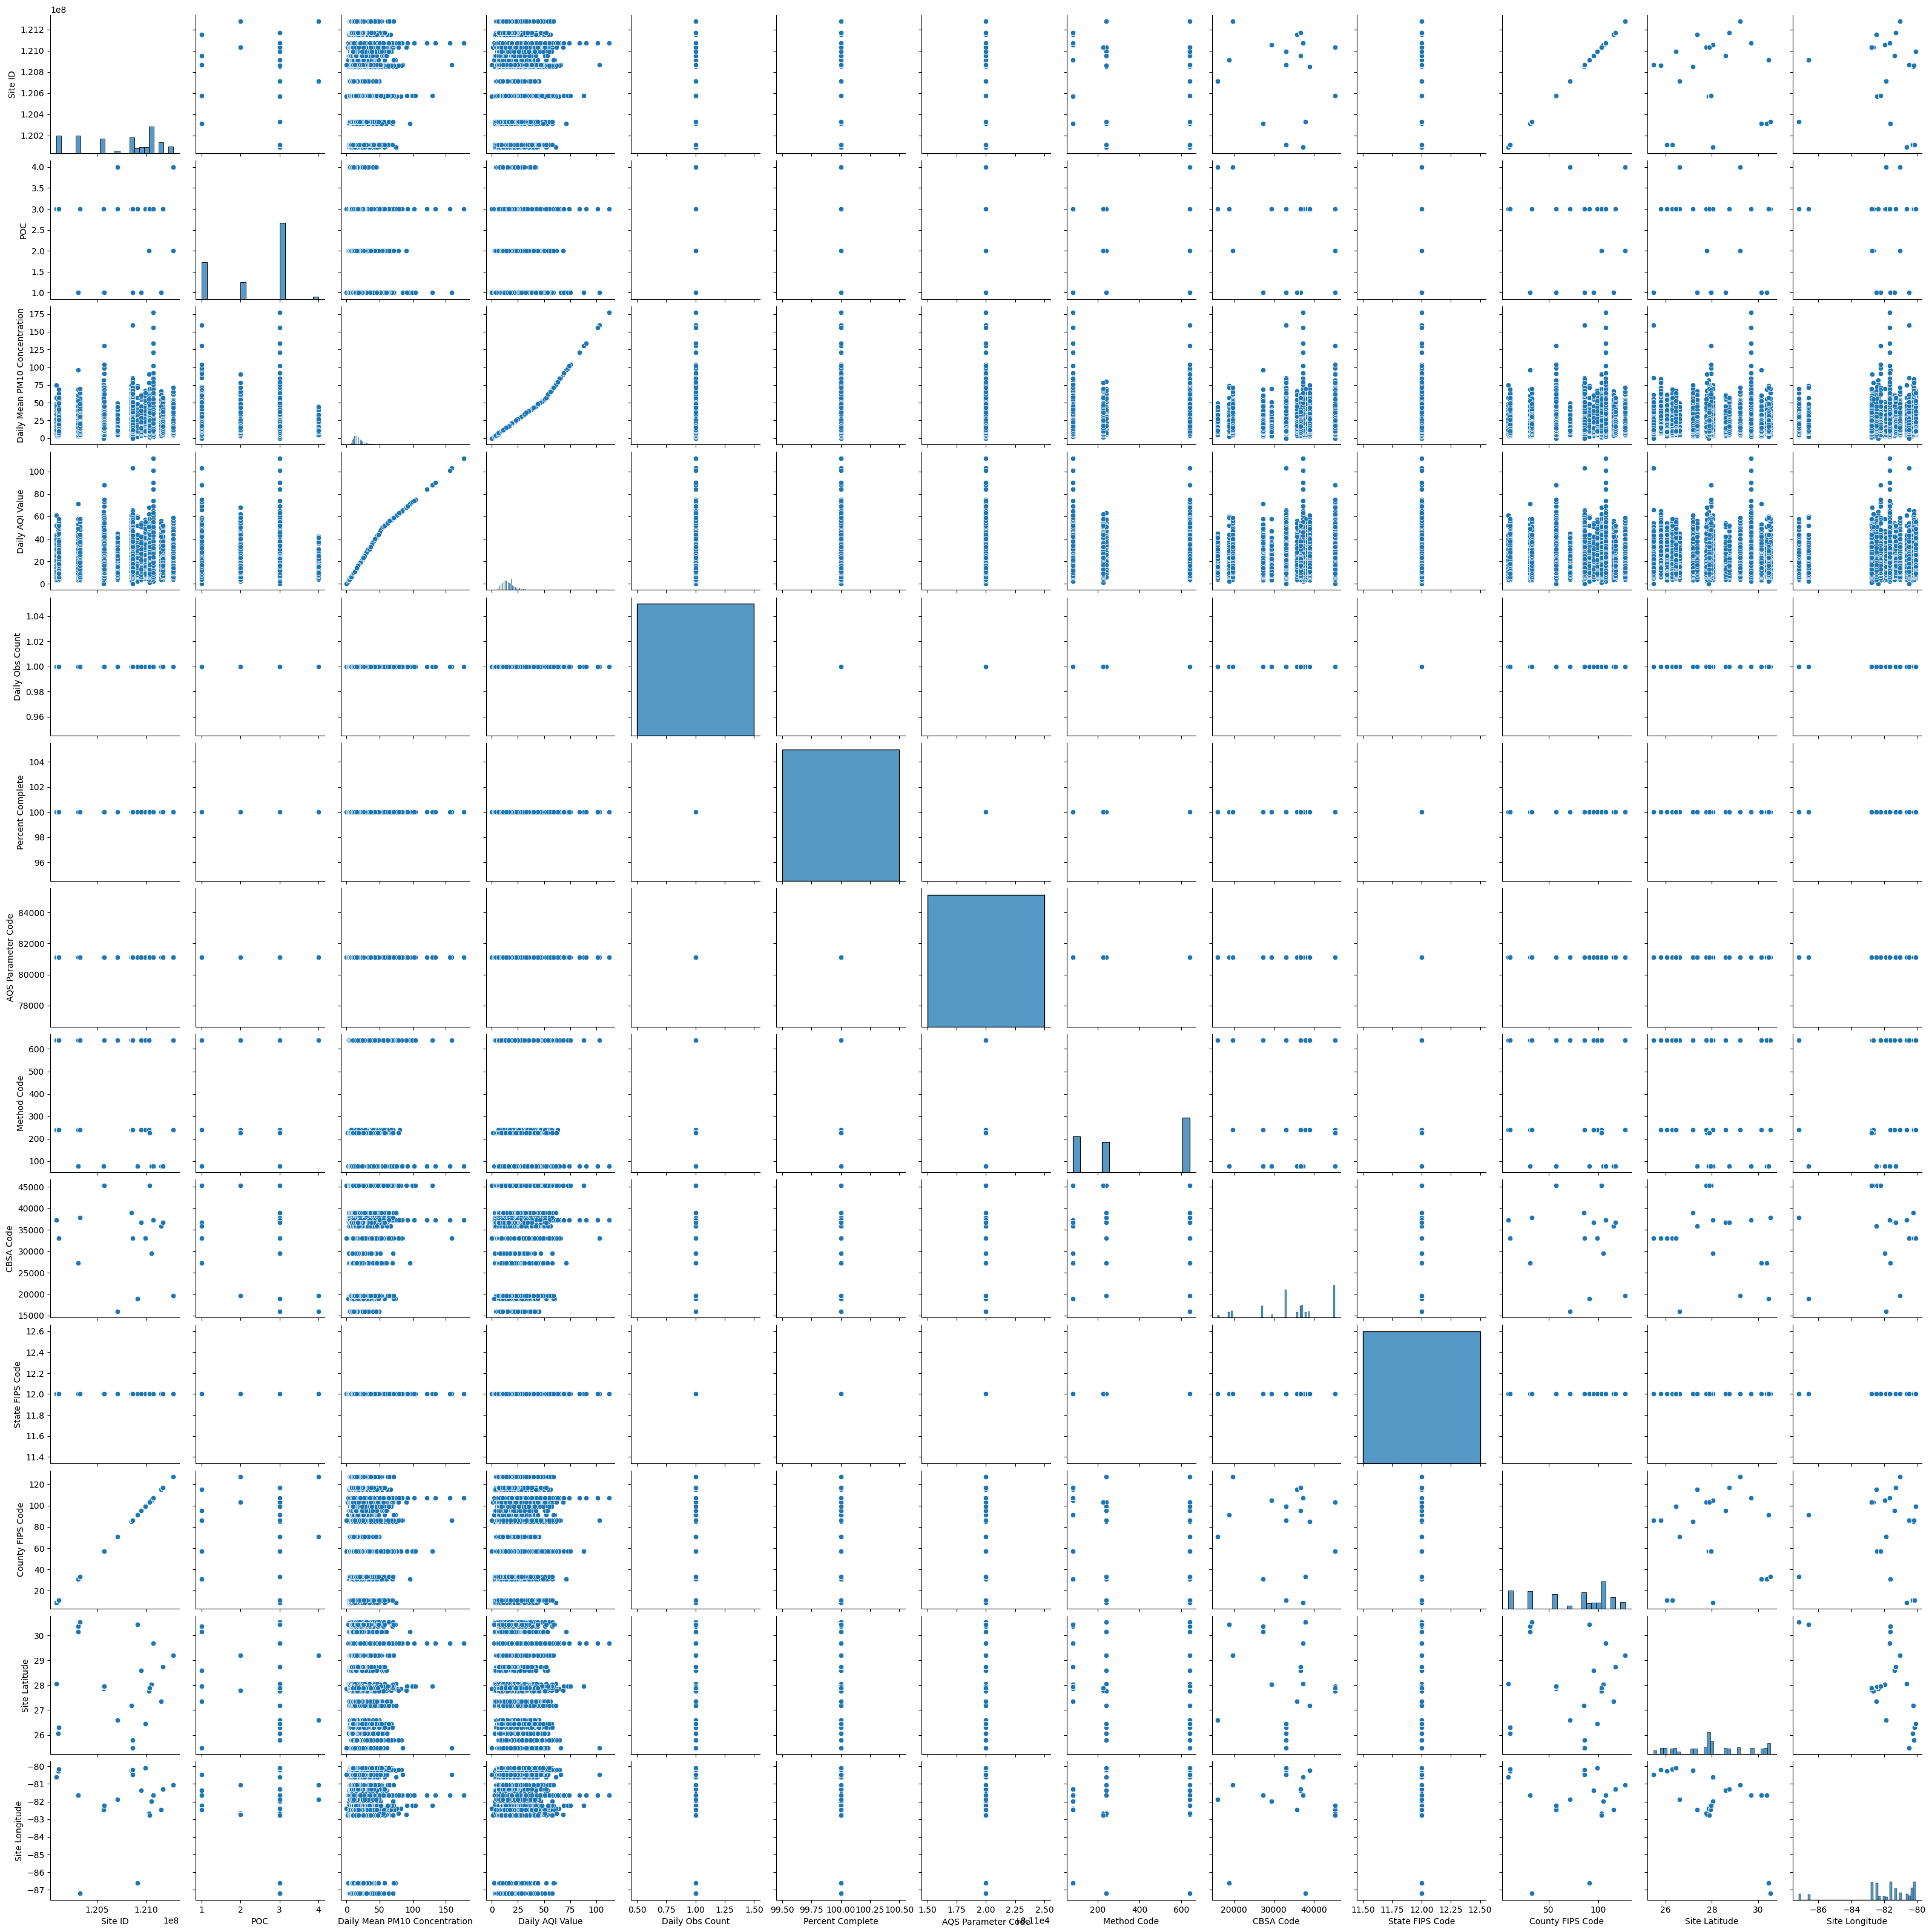

In [180]:
sns.pairplot(df)

<Axes: ylabel='Density'>

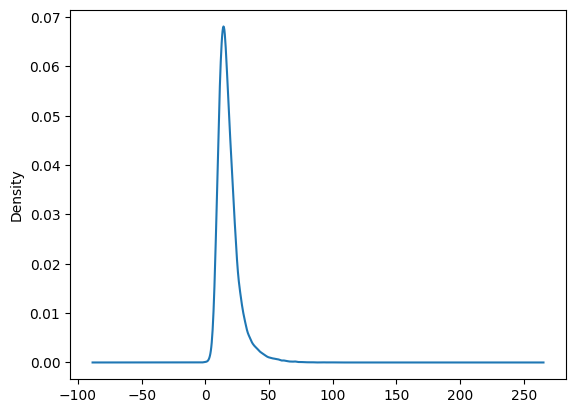

In [181]:
df['Daily Mean PM10 Concentration'].plot.density()

In [242]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Site ID,POC,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude,Days_Since_Start,Month,Day,Year
Site ID,1.000000,-0.007466,0.034652,0.035194,NaN,NaN,NaN,-0.321188,-0.001004,NaN,0.999988,0.007982,-0.039945,-0.016440,-0.002028,0.003038,-0.015508
POC,-0.007466,1.000000,0.019809,0.018863,NaN,NaN,NaN,-0.039081,-0.070909,NaN,-0.007116,-0.172305,-0.020215,-0.012501,-0.003494,0.003752,-0.011135
Daily Mean PM10 Concentration,0.034652,0.019809,1.000000,0.994760,NaN,NaN,NaN,-0.120405,0.123087,NaN,0.034647,-0.076981,0.028010,-0.023637,-0.049564,-0.023481,-0.004771
Daily AQI Value,0.035194,0.018863,0.994760,1.000000,NaN,NaN,NaN,-0.124043,0.125678,NaN,0.035185,-0.081051,0.027957,-0.025940,-0.054772,-0.023999,-0.005174
Daily Obs Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percent Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS Parameter Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method Code,-0.321188,-0.039081,-0.120405,-0.124043,NaN,NaN,NaN,1.000000,-0.191493,NaN,-0.322037,-0.190163,0.253518,0.424745,0.068972,0.010168,0.378372
CBSA Code,-0.001004,-0.070909,0.123087,0.125678,NaN,NaN,NaN,-0.191493,1.000000,NaN,0.000050,-0.225353,-0.020863,-0.062304,-0.023672,-0.003221,-0.052772
State FIPS Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

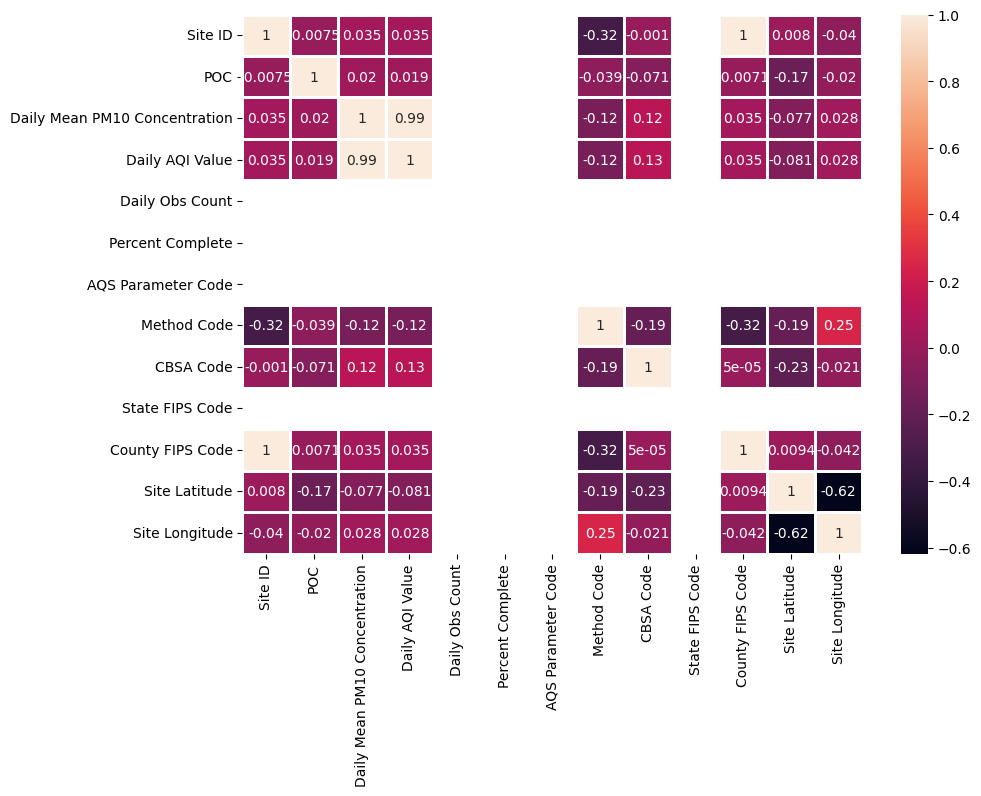

In [106]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

In [183]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM10 Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude']

In [184]:
print(df['Date'].head())

0    01/01/2023
1    01/02/2023
2    01/03/2023
3    01/04/2023
4    01/05/2023
Name: Date, dtype: object


In [185]:
# Asegúrate de que 'Date' sea un datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear nuevas columnas a partir de la fecha
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [186]:
df['Year'] = df['Date'].dt.year


In [247]:
# Variables categóricas
cat_cols = ['Source', 'Units', 'Local Site Name', 'AQS Parameter Description',
            'CBSA Name', 'State', 'County']

# Convertir categóricas a variables dummy
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# Variables numéricas
num_cols = ['Days_Since_Start', 'Month', 'Day', 'Year',
             'Percent Complete',
            'Site Latitude', 'Site Longitude', 'Method Code']
X = df.drop(columns=[
    'Daily Mean PM10 Concentration',
    'Daily AQI Value',
    'Daily Obs Count',
    'AQS Parameter Code',
    'State FIPS Code'
])
X_num = df[num_cols]

# Combinar
X = pd.concat([X_num, df_encoded], axis=1)



In [248]:
# Tu variable objetivo REAL
y = df['Daily Mean PM10 Concentration']


In [249]:
y = pd.to_numeric(y, errors="coerce")
print(y.dtype)
print(y.head())

int64
0    21
1    13
2    12
3    14
4    12
Name: Daily Mean PM10 Concentration, dtype: int64


In [250]:
df['Date'].min()

Timestamp('2023-01-01 00:00:00')

In [251]:
print(X.dtypes)

Days_Since_Start      int64
Month                 int32
Day                   int32
Year                  int32
Percent Complete    float64
                     ...   
County_Polk            bool
County_Putnam          bool
County_Sarasota        bool
County_Seminole        bool
County_Volusia         bool
Length: 61, dtype: object


In [252]:
y.head()

,Daily Mean PM10 Concentration
0,21
1,13
2,12
3,14
4,12


PRUEBA TEST

In [289]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X = df[[
    "Days_Since_Start", "Month", "Day", "Year","Daily AQI Value",
     "Percent Complete",
    "Site Latitude", "Site Longitude", "Method Code"
]]

In [274]:
y = df["Daily Mean PM10 Concentration"]

In [291]:
X = X.select_dtypes(include=["int64", "float64", "int32"])
y = pd.to_numeric(y, errors="coerce")

In [290]:
print("X types:\n", X.dtypes)
print("y type:", y.dtype)

X types:
 Site ID               int64
POC                   int64
Percent Complete    float64
Method Code         float64
CBSA Code             int64
County FIPS Code      int64
Site Latitude       float64
Site Longitude      float64
Days_Since_Start      int64
Month                 int32
Day                   int32
Year                  int32
dtype: object
y type: int64


In [292]:
# Split temporal (sin shuffle porque es serie de tiempo)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)


In [293]:

print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (14927, 12)
Tamaño del conjunto de características de prueba: (6398, 12)
Tamaño de la variable objetivo del entrenamiento: (14927,)
Tamaño de la variable objetivo de prueba: (6398,)


In [294]:
print(y_train.dtype)
print(y_train.head())


int64
0    21
1    13
2    12
3    14
4    12
Name: Daily Mean PM10 Concentration, dtype: int64


In [295]:
print(X_train.columns[:10])
print(X_train.dtypes.head(10))


Index(['Site ID', 'POC', 'Percent Complete', 'Method Code', 'CBSA Code',
       'County FIPS Code', 'Site Latitude', 'Site Longitude',
       'Days_Since_Start', 'Month'],
      dtype='object')
Site ID               int64
POC                   int64
Percent Complete    float64
Method Code         float64
CBSA Code             int64
County FIPS Code      int64
Site Latitude       float64
Site Longitude      float64
Days_Since_Start      int64
Month                 int32
dtype: object


In [296]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [297]:
lm = LinearRegression()

In [298]:
lm.fit(X_train, y_train)

LinearRegression()

In [299]:
print(X_train.shape, y_train.shape)


(14783, 12) (14783,)


In [300]:

print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: -1351383.0286646269


In [301]:
print("Los coeficientes del modelo lineal:", lm.coef_)


Los coeficientes del modelo lineal: [ 1.66654189e-04  8.30660588e-02 -1.07340026e-10 -5.21174370e-03
  1.30511280e-04 -1.67769334e+00 -2.91606651e-01  1.29513176e-01
 -1.79750013e+00  5.46725375e+01  1.75368555e+00  6.58112545e+02]


In [302]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Site ID,1.666542e-04
POC,8.306606e-02
Percent Complete,-1.073400e-10
Method Code,-5.211744e-03
CBSA Code,1.305113e-04
County FIPS Code,-1.677693e+00
Site Latitude,-2.916067e-01
Site Longitude,1.295132e-01
Days_Since_Start,-1.797500e+00
Month,5.467254e+01


In [ ]:
y_pred = modelo.predict(X_test)

In [154]:
resultados = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicho': y_pred[:10]
})
print(resultados)

   Real   Predicho
0    15  15.118347
1    12  11.793039
2    15  15.118664
3    21  20.661266
4    22  21.769914
5    19  19.553094
6    22  21.770230
7    22  21.770389
8    20  20.662058
9    19  19.553728


2025

In [135]:
train = df[df['Year'] < 2025]   # 2023 y 2024
test = df[df['Year'] == 2025]


In [170]:
X_train = train[['Days_Since_Start', 'Month', 'Day', 'Year',
                  'Percent Complete',
                 'Site Latitude', 'Site Longitude', 'Method Code']]

X_test = test[['Days_Since_Start', 'Month', 'Day', 'Year', 'Percent Complete',
               'Site Latitude', 'Site Longitude', 'Method Code']]

# Target
y_train = train['Daily Mean PM10 Concentration']
y_test = test['Daily Mean PM10 Concentration']

In [171]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [172]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [158]:
y_pred_2025 = lm.predict(X_test)


In [159]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Crear un DataFrame para ver resultados
comparacion = pd.DataFrame({
    'Fecha': test['Date'].values,
    'Real': y_test.values,
    'Predicho': y_pred_2025
})

print(comparacion.head())

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred_2025)
r2 = r2_score(y_test, y_pred_2025)

print("MSE:", mse)
print("R²:", r2)


       Fecha  Real   Predicho
0 2025-01-01    15  15.119374
1 2025-01-02     8   7.254515
2 2025-01-03     9   8.379994
3 2025-01-04     9   8.381681
4 2025-01-05     9   8.383367
MSE: 0.3158729167382116
R²: 0.9959319430546262
